# Analysis of Jiu-Jitsu Competition Data


In [1]:
# Importing necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

# Setting display options for better readability
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)


## Dataset Description

This dataset is derived from a GitHub project that scrapes data from the Brazilian Jiu-Jitsu (BJJ) Heroes website. The project's repository can be found at [https://github.com/bjagrelli/bjj_data_scrapping](https://github.com/bjagrelli/bjj_data_scrapping). The dataset contains detailed information about BJJ matches and fighters.

### Columns:

- **ID**: Unique identifier for each record.
- **First Name**: Fighter's first name.
- **Last Name**: Fighter's last name.
- **Nickname**: Fighter's nickname.
- **Team**: Fighter's team or club.
- **Id**: Unique ID for the fighter.
- **Opponent**: Name of the fighter's opponent.
- **W/L**: Win or Loss status for the fighter.
- **Method**: Method of victory or defeat.
- **Competition**: Name of the BJJ competition.
- **Weight**: Weight category of the match.
- **Stage**: Stage of the competition (e.g., final, semifinal).
- **Year**: Year of the match.
- **Full Name**: Full name of the fighter.
- **Win**: Binary indicator of win (1) or loss (0).
- **Win_Streak**: Number of consecutive wins up to that match.

### Purpose:

The dataset is intended for analysis of BJJ match outcomes, fighters' performance, and competition trends. It is suitable for statistical analysis, pattern recognition, and historical data review in the context of martial arts research.


### Data Cleaning

### Initial Data State
The initial dataset obtained from the web scraping of the BJJ Heroes website was structured in a limited and condensed format. Specifically, the data was split into only 5 columns, making it difficult to analyze and extract meaningful insights directly. The columns were not distinctly separated, with multiple pieces of information combined in single columns.

### Transformation Process
To make the dataset more suitable for analysis, the following transformation steps were taken:

1. **Splitting Combined Data**: Data in single columns was split into multiple columns for better clarity and structure.
2. **Renaming Columns**: Columns were renamed to accurately represent the data they contained.
3. **Handling Missing Data**: Where applicable, missing data was identified and handled appropriately.

The Python code used for this transformation is provided below:


In [2]:
# Re-load the new data
data_new = pd.read_csv("data_new_sep.csv")

In [3]:
# Correct the column names first, assuming the first column is 'Link' which needs to be removed
data_new.columns = ['Link', 'Name', 'Sub', 'Unused1', 'Unused2']

In [4]:
# Dropping the 'Link' column from the DataFrame
data_new.drop('Link', axis=1, inplace=True)

In [5]:
# Splitting 'Name' column
split_name = data_new['Name'].str.split('|', expand=True)
data_new['First Name'] = split_name[0]
data_new['Last Name'] = split_name[1]
data_new['Nickname'] = split_name[2]
data_new['Team'] = split_name[3]

In [6]:
# Splitting 'Sub' column
split_sub = data_new['Sub'].str.split("|", expand=True)
data_new[['Id', 'Opponent', 'W/L', 'Method', 'Competition', 'Weight', 'Stage', 'Year']] = split_sub

In [7]:
def parse_method(method):
    if pd.isna(method):
        return method, None, None

    # Initial values for points and advantage
    points, advantage = None, None

    # Handling cases where 'Pts:' or 'Adv' is in the method
    if 'Pts:' in method:
        method_parts = method.split('Pts:', 1)
        method = 'Points'
        points_part = method_parts[1].strip()

        if ', Adv' in points_part:
            points, advantage = points_part.split(', ', 1)
        else:
            points = points_part

    elif method.strip() == 'Adv':
        method = 'Advantage'
        advantage = 'Adv'

    # Handling other methods
    else:
        method = method.strip()
        if method == 'Points':
            method = 'Points'
            points = 'Points'
        elif method == 'Adv':
            method = 'Advantage'
            advantage = 'Advantage'

    return method, points, advantage

In [8]:
# Apply the function to each row and create new columns
data_new[['Method', 'Points', 'Advantage']] = data_new.apply(lambda row: pd.Series(parse_method(row['Method'])), axis=1)

In [9]:
# Dropping unused columns
data_new.drop(columns=['Name', 'Sub', 'Unused1', 'Unused2'], inplace=True)

In [10]:
# Move the 'Id' column to the first position
cols = ['Id'] + [col for col in data_new if col != 'Id']
data_new = data_new[cols]

In [13]:
# Display the processed data
data_new.head(50)

,Id,First Name,Last Name,Nickname,Team,Opponent,W/L,Method,Competition,Weight,Stage,Year,Points,Advantage
0,NaN,"['Aarae', 'Alexander', '', 'Team Lloyd Irvin']",None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7672,Aaron,Johnson,Tex,Unity JJ,Quentin Rosensweig,L,Inside heel hook,Kakuto 5,ABS,SPF,2015,None,None
2,8190,Aaron,Johnson,Tex,Unity JJ,Neiman Gracie,L,RNC,NoGi Pan Ams,94KG,SF,2015,None,None
3,8785,Aaron,Johnson,Tex,Unity JJ,Richie MartinezRichie Martinez,L,Heel hook,Kakuto Challenge,ABS,SF,2015,None,None
4,9059,Aaron,Johnson,Tex,Unity JJ,Leo NogueiraLeo Nogueira,L,Points,Atlanta W. Open,94KG,SF,2016,Points,None
5,9110,Aaron,Johnson,Tex,Unity JJ,Romulo AzevedoRomulo Azevedo,L,N/A,UAEJJF NYC Pro,94KG,SF,2016,None,None
6,9116,Aaron,Johnson,Tex,Unity JJ,Abraham MarteAbraham Marte,L,Cross choke,UAEJJF NYC Pro,HWABS,4F,2016,None,None
7,9373,Aaron,Johnson,Tex,Unity JJ,Andre GalvaoAndre Galvao,L,Choke,Pan American,ABS,R2,2016,None,None
8,9500,Aaron,Johnson,Tex,Unity JJ,Joao Soares,L,Triangle,Boston Spring O.,100KG,F,2016,None,None
9,10087,Aaron,Johnson,Tex,Unity JJ,Bernardo FariaBernardo Faria,L,Triangle armbar,World Champ.,ABS,R2,2016,None,None


#### Parsing Match Outcome Methods

The `parse_method` function is employed to parse the 'Method' column, which describes the outcome of a Brazilian Jiu-Jitsu match. This function is responsible for extracting and segregating the data into two new columns: 'Points' and 'Advantage'. Here's the detailed logic of the function:

1. **Missing Values**: If the 'Method' entry is missing (NaN), both 'Points' and 'Advantage' are assigned `None`.

2. **Detailed Points Victory**: If the 'Method' includes 'Pts:' with details (e.g., "Pts: 2x0"), this denotes a victory by a specific point difference. The function extracts this detailed score into the 'Points' column.

   - When ', Adv' follows the point details (e.g., "Pts: 2x2, Adv"), it indicates a victory by advantage despite a tied score. The function parses the score into the 'Points' column and 'Adv' into the 'Advantage' column.

3. **Victory by Advantage with No Specific Points**: If 'Method' is just 'Adv', it indicates a win by advantage where the exact points are not provided. Here, 'Points' remains `None` as no specific score is available, and 'Advantage' is set to 'Adv'.

4. **Victory by Submission**: If the 'Method' specifies a submission technique, this implies a win by submission. Consequently, both 'Points' and 'Advantage' columns will be set to `None`.

5. **Victory by Points with No Specific Score**: When 'Method' contains only "Points" without further scoring details, it suggests a win on points where the precise score was not recorded. The 'Points' column will be `None` to reflect the unavailability of the score, and 'Advantage' will also be `None`.

By employing this function, the 'Method' column is effectively transformed into a structured and analytically useful format, facilitating a more straightforward assessment of the match outcomes.


In [15]:
# Function to check for repeated substrings in a string
def remove_repeated_substrings(s):
    if pd.isna(s):
        return s
    else:
        # Find all substrings
        substrings = [s[i: j] for i in range(len(s)) for j in range(i + 1, len(s) + 1)]
        
        # Sort substrings by length in descending order
        substrings.sort(key=len, reverse=True)
        
        # Check each substring
        for substring in substrings:
            # If the substring is repeated and is not a single character
            if s.count(substring) > 1 and len(substring) > 1:
                # Replace all instances of the repeated substring with a single instance
                s = s.replace(substring, substring, 1)
        return s

In [16]:
# Apply the function to 'Opponent'
data_new['Opponent'] = data_new['Opponent'].apply(remove_repeated_substrings)

In [17]:
# Strip unwanted characters from string columns
strip_cols = ['First Name', 'Last Name', 'Nickname', 'Team']
data_new[strip_cols] = data_new[strip_cols].apply(lambda x: x.str.strip(" '[],"))

In [18]:
# Combine 'First Name' and 'Last Name' into 'Full Name'
data_new['Full Name'] = data_new['First Name'] + ' ' + data_new['Last Name']

In [135]:
# Removing rows where the year is NaN or 0 
data_new['Year'] = data_new['Year'].replace(0, np.nan)

# Removing rows with NaN in 'Year'
data_new = data_new.dropna(subset=['Year'])


In [136]:
# Removing rows where Opponents name is "Unknown"
data_new = data_new[data_new['Opponent'] != 'Unknown']


In [137]:
# Removing rows where Submission is "N/A" or "submission"
data_new = data_new[(data_new['Method'] != 'N/A') & (data_new['Method'] != '---')]

In [138]:
# Define critical columns
critical_columns = ['Year', 'Method', 'Opponent', 'First Name', 'Last Name']

In [139]:
data_new = (data_new
                .dropna(subset=critical_columns)
                .drop_duplicates())

In [140]:
# Display the processed data
data_new.head()

,Id,First Name,Last Name,Nickname,Team,Opponent,W/L,Method,Competition,Weight,Stage,Year,Points,Advantage,Full Name
1,7672,Aaron,Johnson,Tex,Unity JJ,Quentin Rosensweig,L,Inside heel hook,Kakuto 5,ABS,SPF,2015.0,None,None,Aaron Johnson
2,8190,Aaron,Johnson,Tex,Unity JJ,Neiman Gracie,L,RNC,NoGi Pan Ams,94KG,SF,2015.0,None,None,Aaron Johnson
3,8785,Aaron,Johnson,Tex,Unity JJ,Richie MartinezRichie Martinez,L,Heel hook,Kakuto Challenge,ABS,SF,2015.0,None,None,Aaron Johnson
4,9059,Aaron,Johnson,Tex,Unity JJ,Leo NogueiraLeo Nogueira,L,Points,Atlanta W. Open,94KG,SF,2016.0,Points,None,Aaron Johnson
6,9116,Aaron,Johnson,Tex,Unity JJ,Abraham MarteAbraham Marte,L,Cross choke,UAEJJF NYC Pro,HWABS,4F,2016.0,None,None,Aaron Johnson


In [141]:
# Create a mask for rows where any critical column has NaN or 'None'
mask = data_new[critical_columns].isna().any(axis=1) | (data_new[critical_columns] == 'None').any(axis=1)

# Query the DataFrame using the mask
rows_with_nan_or_none = data_new[mask]

print(rows_with_nan_or_none.head())
data_frame = data_new


Empty DataFrame
Columns: [Id, First Name, Last Name, Nickname, Team, Opponent, W/L, Method, Competition, Weight, Stage, Year, Points, Advantage, Full Name]
Index: []


## Exploratory Data Analysis (EDA)

Conduct and describe your exploratory data analysis. This includes generating descriptive statistics and creating initial visualizations to understand the data better.


## Descriptive Statistics

### Basic Descriptive Statistics

In [142]:
# Assuming 'data' is your DataFrame
descriptive_stats = data_frame.describe()
print(descriptive_stats)

               Year
count  39706.000000
mean    2017.729084
std        4.715310
min     1932.000000
25%     2016.000000
50%     2019.000000
75%     2021.000000
max     2023.000000


In [143]:
# Replace 'Method' and 'Opponent' with the actual names of your categorical columns
method_counts = data_frame['Method'].value_counts()
opponent_counts = data_frame['Opponent'].value_counts()
print("Method Counts:\n", method_counts)
print("\nOpponent Counts:\n", opponent_counts)


Method Counts:
 Method
Points                 19207
Referee Decision        3545
Choke from back         2522
Armbar                  2261
RNC                     1348
                       ...  
Scissors choke             1
Leg lock                   1
Straignt ankle lock        1
Triange armbar             1
Knee on belly/choke        1
Name: count, Length: 266, dtype: int64

Opponent Counts:
 Opponent
Leandro LoLeandro Lo            203
Fellipe AndrewFellipe Andrew    162
Gianni GrippoGianni Grippo      158
Erberth SantosErberth Santos    155
Lucas BarbosaLucas Barbosa      150
                               ... 
M. Da Silva                       1
Joao Carvalho                     1
Anderson Macedo                   1
Claudiney Xavier                  1
Kevin Vieira                      1
Name: count, Length: 8780, dtype: int64


### Analysis of Most Popular Submissions

Here we analyze the types of submissions that occurred most frequently in the competitions. This gives an insight into the most effective or preferred submission techniques in Jiu-Jitsu.

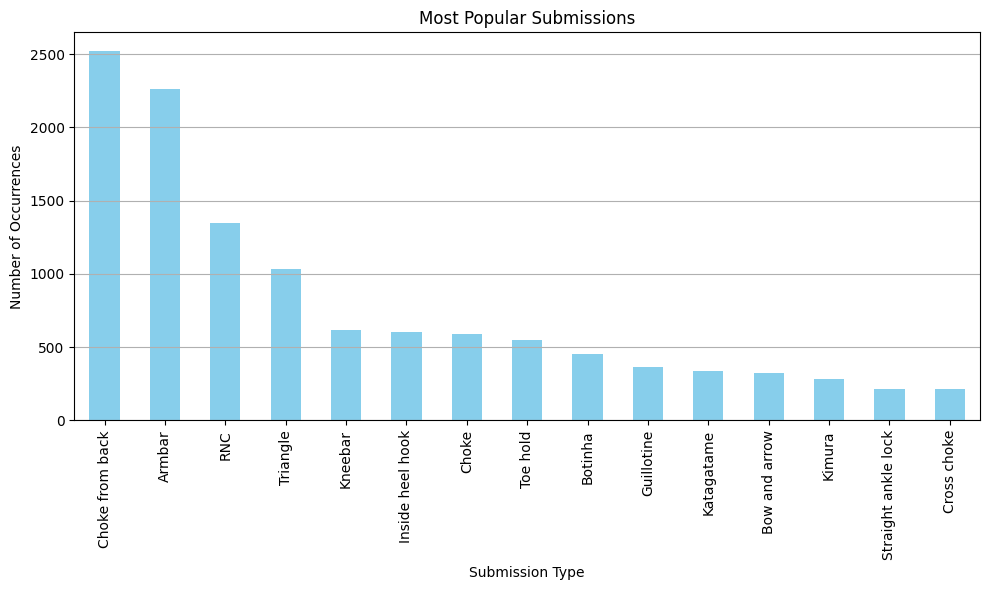

Method
Choke from back     2522
Armbar              2261
RNC                 1348
Triangle            1031
Kneebar              616
Inside heel hook     604
Choke                589
Toe hold             548
Botinha              454
Guillotine           364
Name: count, dtype: int64

In [104]:
# Filter out 'Points', 'Referee Decision', 'Submission','Advantage', 'DQ', and 'EBI/OT' from the 'Method' column
filtered_methods = data_frame[(data_frame['Method'] != 'Points') & 
                              (data_frame['Method'] != 'Referee Decision') & 
                              (data_frame['Method'] != 'Submission') & 
                              (data_frame['Method'] != 'Advantage') &
                              (data_frame['Method'] != 'DQ') &
                              (data_frame['Method'] != 'EBI/OT')]
 
# Counting the frequency of each submission type
submission_counts = filtered_methods['Method'].value_counts().head(15)

# Plotting the submission counts
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
submission_counts.plot(kind='bar', color='skyblue')
plt.title("Most Popular Submissions")
plt.xlabel("Submission Type")
plt.ylabel("Number of Occurrences")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

submission_counts.head(10)


### Identifying Best Scoring Athletes Each Year

In this section, we identify the athletes who scored the highest points each year. This highlights the top performers and their consistency over the years.

### Statistical Analysis of Match Points

We now perform a statistical analysis on the points scored in matches. This includes calculating descriptive statistics for points scored by winners and losers in matches decided by points.

In [ ]:
# Filtering for matches decided by points and calculating statistics
points_matches = adcc_df[adcc_df['win_type'] == 'POINTS']
winner_points_stats = points_matches['winner_points'].describe()
loser_points_stats = points_matches['loser_points'].describe()

# Displaying the statistics
print("Winner Points Statistics:")
print(winner_points_stats)
print("\nLoser Points Statistics:")
print(loser_points_stats)

## Question Formation

Document the specific questions or hypotheses you aim to explore in this analysis.


## Hypothesis Testing and Statistical Analysis

Detail the hypothesis tests you conducted, including t-tests or chi-squared tests, and present your findings.


## Correlation Analysis

Perform correlation tests between selected variables and discuss the outcomes.


## Predictive Analysis

Apply regression analysis based on your identified correlations and interpret the results.


## Conclusions

Summarize the key findings of your analysis, discuss their implications, and provide any recommendations or insights.


## References

List all the references and data sources used in your analysis.
